<a href="https://colab.research.google.com/github/gusorna/INSE_6210_PROJECT/blob/main/PROJECT6210_PyCaret_University.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [2]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The examined dataset contains the information required to take in consideration for admission in a university for higher studies.

This data contains the following attributes:
1. GRE Scores
2. TOEFL Scores
3. University Rating (UR)
4. Statement of Purpose (SOP)
5. Letter of Recomendation (LOR)
6. Undergraduate GPA (CGPA)
7. Chance of Admit (COA)
All of these parameters were real-valued continuous.

https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university

In [6]:
#read cvs file into dataframe
from google.colab import files
#uploaded = files.upload()
#df = pd.read_csv('data_u.csv')
df = pd.read_csv('https://raw.githubusercontent.com/gusorna/INSE_6210_PROJECT/main/data_for_university.csv')
df.head(25)

GRE  TOEFL  SOP  LOR   CGPA   COA  UR
0   337    118  4.5   4.5  9.65  0.92   4
1   324    107  4.0   4.5  8.87  0.76   4
2   316    104  3.0   3.5  8.00  0.72   3
3   322    110  3.5   2.5  8.67  0.80   3
4   314    103  2.0   3.0  8.21  0.65   2
5   330    115  4.5   3.0  9.34  0.90   5
6   321    109  3.0   4.0  8.20  0.75   3
7   308    101  3.0   4.0  7.90  0.68   2
8   302    102  2.0   1.5  8.00  0.50   1
9   323    108  3.5   3.0  8.60  0.45   3
10  325    106  3.5   4.0  8.40  0.52   3
11  327    111  4.0   4.5  9.00  0.84   4
12  328    112  4.0   4.5  9.10  0.78   4
13  307    109  4.0   3.0  8.00  0.62   3
14  311    104  3.5   2.0  8.20  0.61   3
15  314    105  3.5   2.5  8.30  0.54   3
16  317    107  4.0   3.0  8.70  0.66   3
17  319    106  4.0   3.0  8.00  0.65   3
18  318    110  4.0   3.0  8.80  0.63   3
19  303    102  3.5   3.0  8.50  0.62   3
20  312    107  3.0   2.0  7.90  0.64   3
21  325    114  3.0   2.0  8.40  0.70   4
22  328    116  5.0   5.0  9.50  0.94   5
23  334    119  5.0   4.5  9.70  0.95   5
24  336    119  4.0   3.5  9.80  0.97   5

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GRE     400 non-null    int64  
 1   TOEFL   400 non-null    int64  
 2   SOP     400 non-null    float64
 3   LOR     400 non-null    float64
 4   CGPA    400 non-null    float64
 5   COA     400 non-null    float64
 6   UR      400 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 22.0 KB


In [8]:
print("Number of duplicated rows is: ", df.duplicated().sum())



Number of duplicated rows is:  0


In [9]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

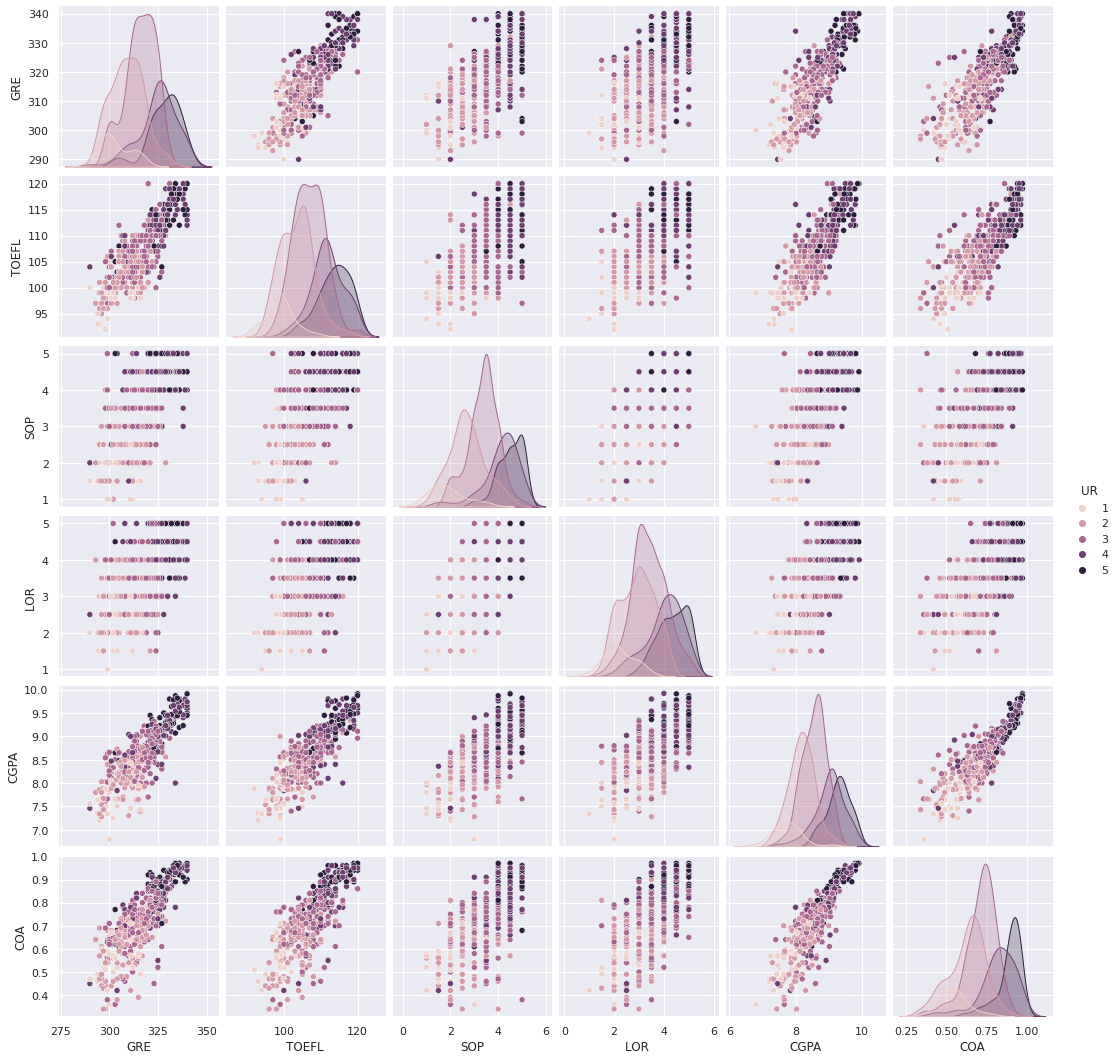

In [10]:
sns.pairplot(df, hue='UR')
plt.show()

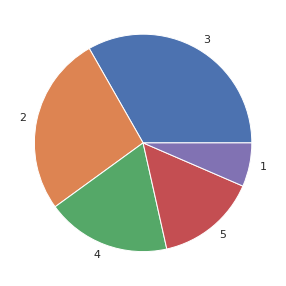

In [11]:
y =df['UR']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [12]:
X = df
X = df.drop(columns=['UR'])
X.head(10)

GRE  TOEFL  SOP  LOR   CGPA   COA
0  337    118  4.5   4.5  9.65  0.92
1  324    107  4.0   4.5  8.87  0.76
2  316    104  3.0   3.5  8.00  0.72
3  322    110  3.5   2.5  8.67  0.80
4  314    103  2.0   3.0  8.21  0.65
5  330    115  4.5   3.0  9.34  0.90
6  321    109  3.0   4.0  8.20  0.75
7  308    101  3.0   4.0  7.90  0.68
8  302    102  2.0   1.5  8.00  0.50
9  323    108  3.5   3.0  8.60  0.45

In [13]:
X.describe().transpose()

count        mean        std     min     25%     50%       75%     max
GRE    400.0  316.807500  11.473646  290.00  308.00  317.00  325.0000  340.00
TOEFL  400.0  107.410000   6.069514   92.00  103.00  107.00  112.0000  120.00
SOP    400.0    3.400000   1.006869    1.00    2.50    3.50    4.0000    5.00
LOR    400.0    3.452500   0.898478    1.00    3.00    3.50    4.0000    5.00
CGPA   400.0    8.598925   0.596317    6.80    8.17    8.61    9.0625    9.92
COA    400.0    0.724350   0.142609    0.34    0.64    0.73    0.8300    0.97

**Standardize the Data**

In [14]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

GRE     TOEFL       SOP      LOR       CGPA       COA
0  1.762107  1.746971  1.093864  1.167321  1.764818  1.373648
1  0.627656 -0.067635  0.596653  1.167321  0.455151  0.250297
2 -0.070467 -0.562528 -0.397769  0.052933 -1.005631 -0.030541
3  0.453126  0.427257  0.099442 -1.061454  0.119339  0.531135
4 -0.244998 -0.727492 -1.392191 -0.504260 -0.653029 -0.522007
5  1.151249  1.252078  1.093864 -0.504260  1.244310  1.233229
6  0.365860  0.262293 -0.397769  0.610127 -0.669819  0.180087
7 -0.768590 -1.057420 -0.397769  0.610127 -1.173537 -0.311379
8 -1.292182 -0.892456 -1.392191 -2.175842 -1.005631 -1.575149
9  0.540391  0.097329  0.099442 -0.504260  0.001805 -1.926196

In [15]:
X.describe().transpose()

count          mean       std       min       25%       50%       75%  \
GRE    400.0 -4.174439e-16  1.001252 -2.339367 -0.768590  0.016799  0.714922   
TOEFL  400.0  5.595524e-16  1.001252 -2.542098 -0.727492 -0.067635  0.757186   
SOP    400.0  7.993606e-17  1.001252 -2.386613 -0.894980  0.099442  0.596653   
LOR    400.0 -1.332268e-16  1.001252 -2.733036 -0.504260  0.052933  0.610127   
CGPA   400.0  7.771561e-16  1.001252 -3.020504 -0.720191  0.018596  0.778370   
COA    400.0 -3.375078e-16  1.001252 -2.698500 -0.592217  0.039668  0.741763   

            max  
GRE    2.023903  
TOEFL  2.076899  
SOP    1.591075  
LOR    1.724515  
CGPA   2.218165  
COA    1.724695

**Observations and variables**

In [16]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

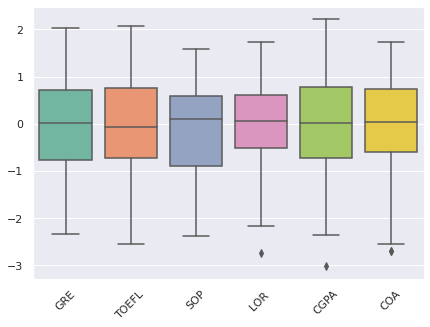

In [17]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

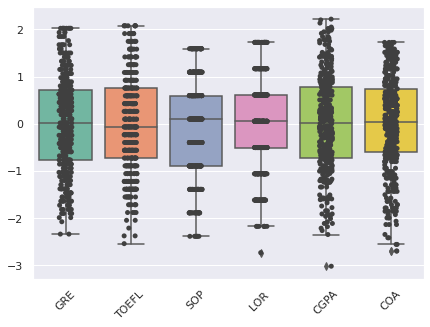

In [18]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

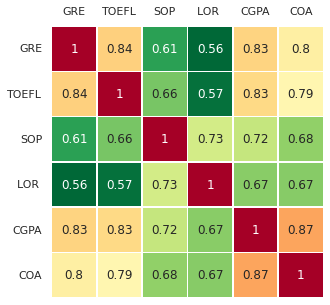

In [19]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

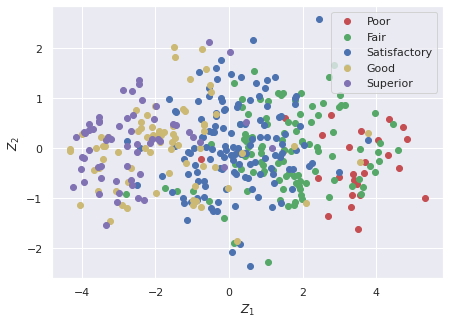

In [20]:
pca = PCA()
Z = pca.fit_transform(X)
# University Rating (UR)
# 1(Poor)->1,  2(Fair)->2, 3(Satisfactory)->3, 4(Good)->4, 5(Superior)->5
idx_Poor = np.where(y == 1)
idx_Fair = np.where(y == 2)
idx_Satisfactory = np.where(y == 3)
idx_Good = np.where(y == 4)
idx_Superior = np.where(y == 5)

plt. figure()
plt.scatter(Z[idx_Poor,0], Z[idx_Poor,1], c='r', label='Poor')
plt.scatter(Z[idx_Fair,0], Z[idx_Fair,1], c='g', label='Fair')
plt.scatter(Z[idx_Satisfactory,0], Z[idx_Satisfactory,1], c='b', label='Satisfactory')
plt.scatter(Z[idx_Good,0], Z[idx_Good,1], c='y', label='Good')
plt.scatter(Z[idx_Superior,0], Z[idx_Superior,1], c='m', label='Superior')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

[[-0.41277809 -0.4160056  -0.38550907 -0.36625131 -0.43722169 -0.42735643]
 [-0.40772943 -0.33973866  0.48876673  0.66318785 -0.14473409 -0.13665779]
 [-0.02539719  0.24669025  0.73602577 -0.52149384 -0.08859141 -0.34199519]
 [ 0.35090286  0.45748088 -0.18723657  0.38993698 -0.33495203 -0.60685845]
 [ 0.72123826 -0.65951168  0.15066692 -0.03811828 -0.01437723 -0.14317642]
 [ 0.13931437  0.08010298  0.11400812 -0.0241284  -0.81709316  0.54125202]]


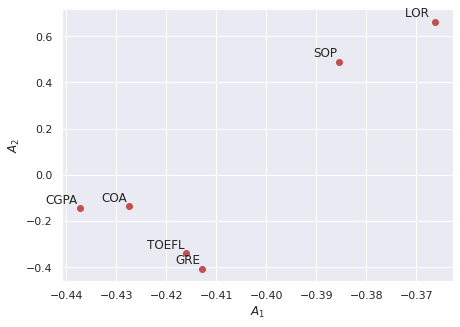

In [21]:
A = pca.components_.T 
print(pca.components_)
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


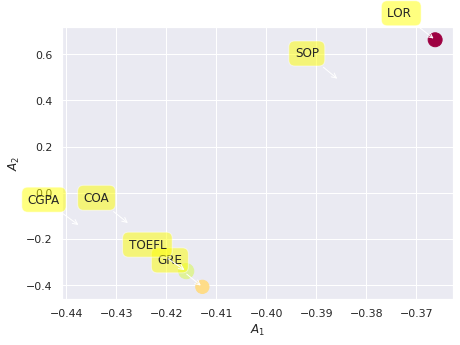

In [22]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

[4.63450326 0.621336   0.28273845 0.19971921 0.15858289 0.11815779]


Text(0, 0.5, 'Explained variance')

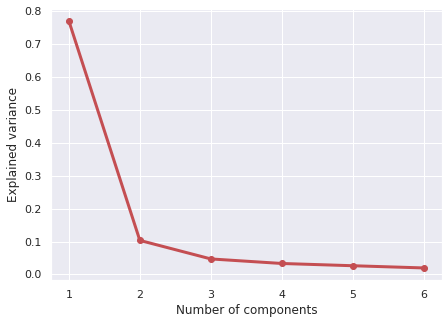

In [23]:
#Eigenvalues
Lambda = pca.explained_variance_ 
print(Lambda)
#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

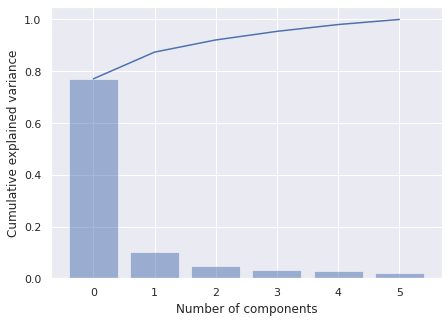

In [24]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

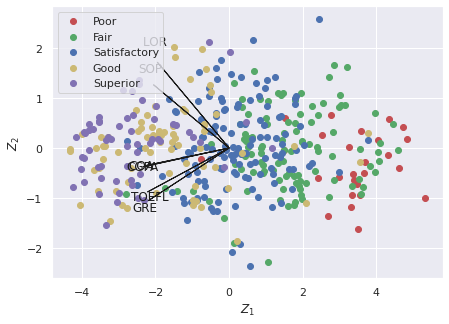

In [25]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Poor,0], Z[idx_Poor,1], c='r', label='Poor')
plt.scatter(Z[idx_Fair,0], Z[idx_Fair,1], c='g', label='Fair')
plt.scatter(Z[idx_Satisfactory,0], Z[idx_Satisfactory,1], c='b', label='Satisfactory')
plt.scatter(Z[idx_Good,0], Z[idx_Good,1], c='y', label='Good')
plt.scatter(Z[idx_Superior,0], Z[idx_Superior,1], c='m', label='Superior')
plt.legend(loc='upper left')

##**Using PCA Library**

In [26]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=e122072dee4d031e15bece0edf986fdaafea235386b1ee69f752985aa54ecb8c
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=9ced340585830d29dc71f5d13b31a1cd6a12877ad04f81d476ac35252813d0df
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


In [27]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [28]:
out['PC']

PC1       PC2       PC3       PC4
0   -3.661990 -0.446328 -0.043559  0.243165
1   -1.194462  0.732761 -0.328147  0.228422
2    0.849794  0.210255 -0.357818  0.168417
3   -0.293520 -1.075104  0.528408 -0.440351
4    1.633760 -0.501974 -0.698586  0.180773
..        ...       ...       ...       ...
395 -1.105342 -0.516323 -0.160231 -0.237871
396 -0.855204 -0.662990 -0.708928 -0.465139
397 -3.287440  0.216045  0.310286 -0.060131
398  0.244160  0.879587 -0.310230 -0.131003
399 -3.534240 -0.405678  0.507623 -0.398602

[400 rows x 4 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [400] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [400] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1ae7d16d60>)

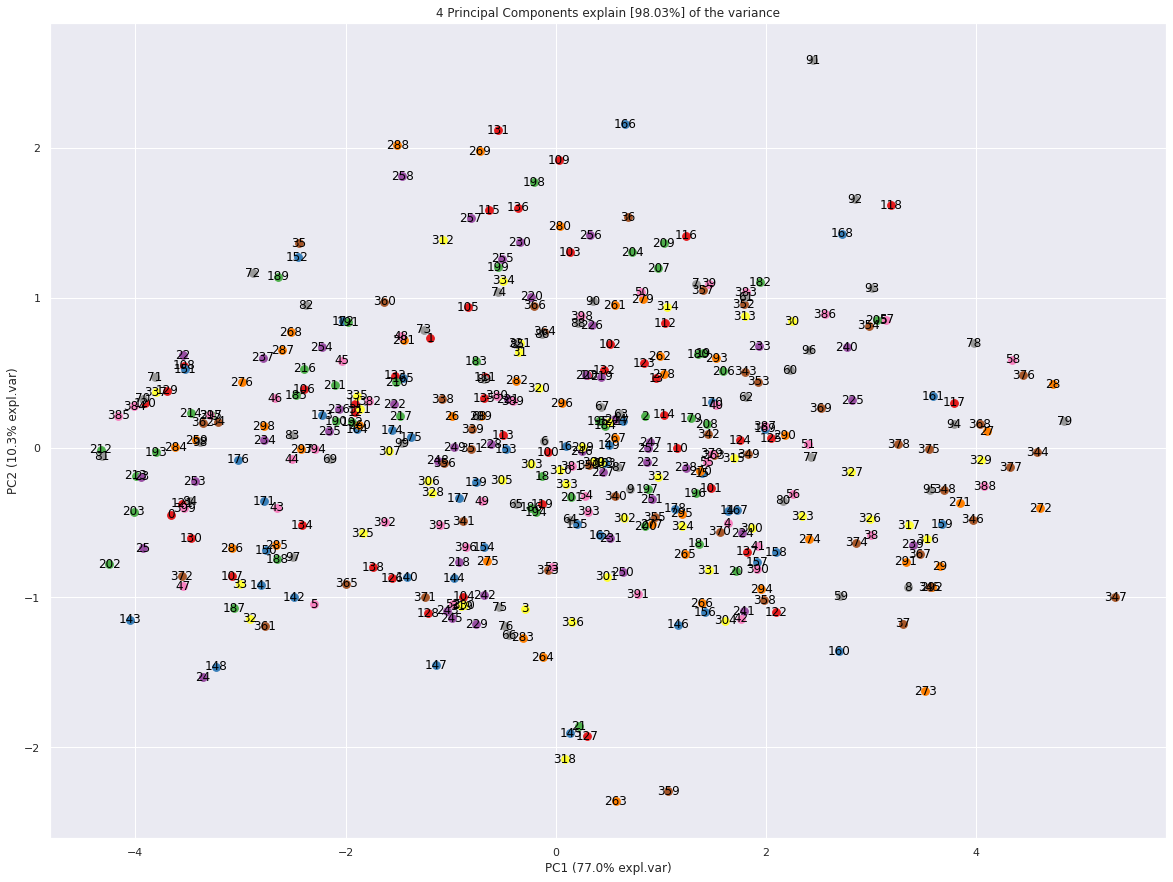

In [29]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [30]:
A = out['loadings'].T

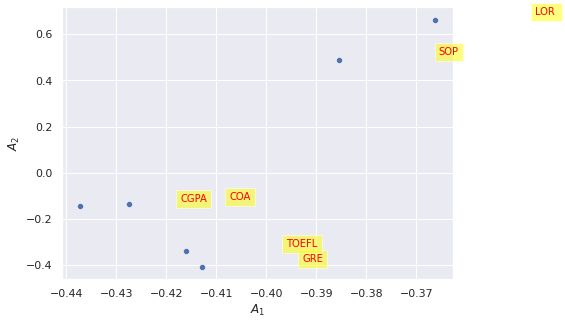

In [31]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

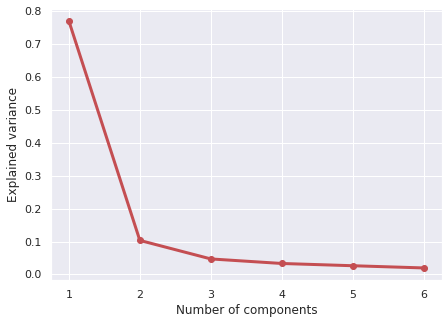

In [32]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

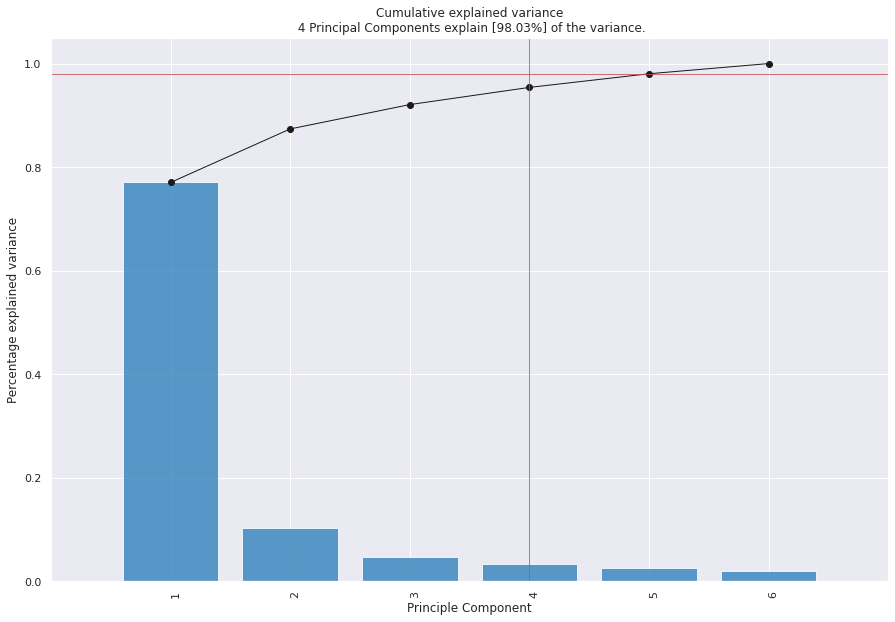

<Figure size 504x360 with 0 Axes>

In [33]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [400] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [400] unique colors! Available unique colors: [9].


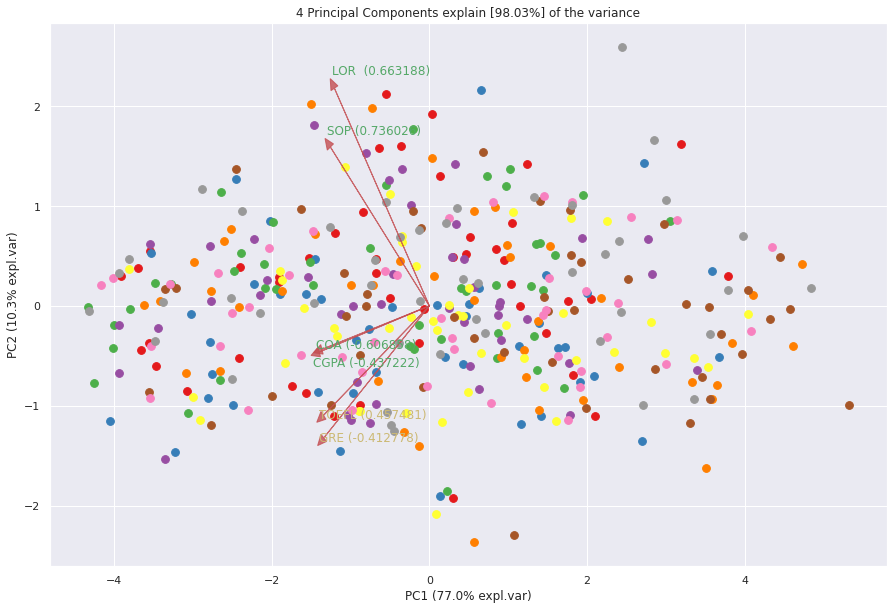

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1aea7f89a0>)

In [34]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [400] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [400] unique colors! Available unique colors: [9].


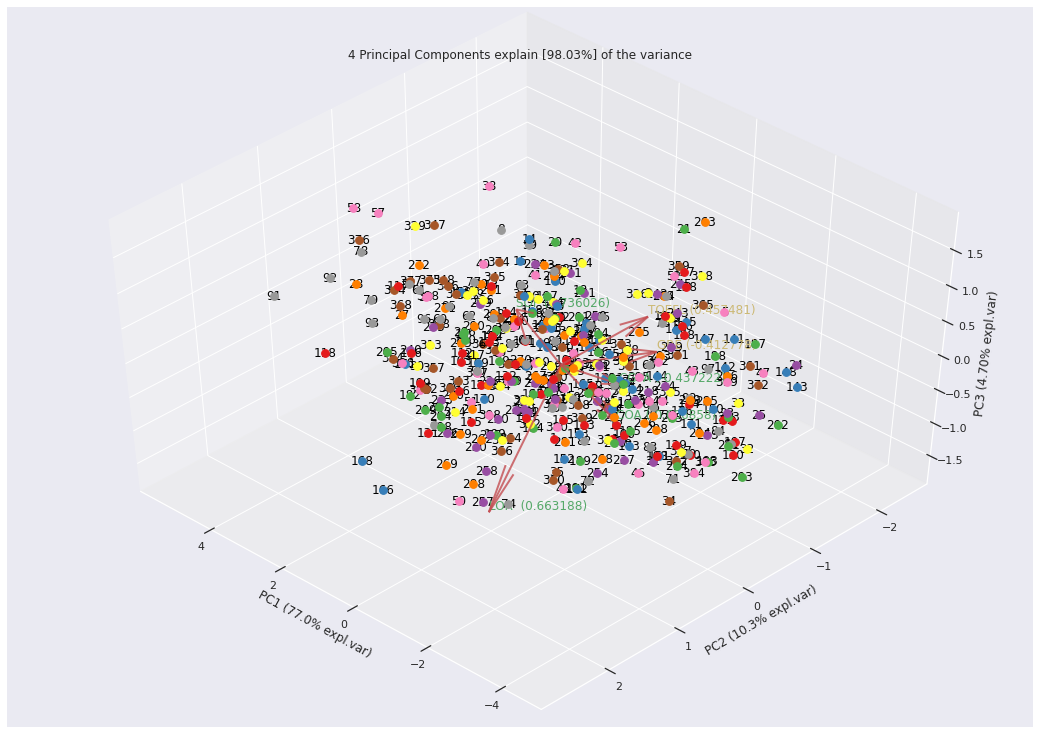

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f1aef48b130>)

In [35]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [36]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 40 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 40 records were not available at the time when the machine learning experiment was performed.

In [37]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (360, 7)
Unseen Data For Predictions: (40, 7)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [38]:
from pycaret.classification import *
clf = setup(data=data, target='UR', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target                UR
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (360, 7)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (251, 6)
12                    Transformed Test Set          (109, 6)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              a5bc
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='UR',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [39]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.5898  0.8399  0.4987  0.5650   
lda          Linear Discriminant Analysis    0.5858  0.8391  0.4876  0.5687   
nb                            Naive Bayes    0.5778  0.8278  0.5879  0.5522   
et                 Extra Trees Classifier    0.5778  0.8273  0.4896  0.5631   
gbc          Gradient Boosting Classifier    0.5502  0.8031  0.4942  0.5540   
ridge                    Ridge Classifier    0.5388  0.0000  0.4098  0.4323   
lightgbm  Light Gradient Boosting Machine    0.5380  0.8014  0.4798  0.5451   
knn                K Neighbors Classifier    0.5298  0.7821  0.4245  0.5331   
qda       Quadratic Discriminant Analysis    0.5178  0.7891  0.4528  0.4925   
lr                    Logistic Regression    0.5142  0.7955  0.4200  0.4581   
dt               Decision Tree Classifier    0.4583  0.6338  0.4355  0.4650   
ada                  Ada Boost Classifier    0.4458  0.6399  0.3550  0.4178   
dummy                    Dummy Classifier    0.3546  0.5000  0.2000  0.1259   
svm                   SVM - Linear Kernel    0.2837  0.0000  0.2294  0.1085   

              F1   Kappa     MCC  TT (Sec)  
rf        0.5656  0.4403  0.4490     0.202  
lda       0.5598  0.4336  0.4427     0.015  
nb        0.5469  0.4384  0.4487     0.014  
et        0.5592  0.4255  0.4310     0.168  
gbc       0.5420  0.3956  0.4000     0.369  
ridge     0.4756  0.3560  0.3698     0.013  
lightgbm  0.5302  0.3799  0.3852     0.147  
knn       0.5093  0.3557  0.3650     0.019  
qda       0.4922  0.3492  0.3559     0.015  
lr        0.4714  0.3299  0.3415     1.015  
dt        0.4461  0.2715  0.2762     0.014  
ada       0.4031  0.2375  0.2533     0.090  
dummy     0.1858  0.0000  0.0000     0.012  
svm       0.1499  0.0413  0.0618     0.021

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [40]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [41]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.4231  0.6113  0.3254  0.3590  0.3873  0.2169  0.2201
1       0.4800  0.6581  0.5198  0.5120  0.4704  0.3172  0.3261
2       0.6000  0.7338  0.4865  0.5587  0.5736  0.4565  0.4617
3       0.4400  0.5982  0.3254  0.4890  0.4215  0.2045  0.2109
4       0.4000  0.5962  0.3738  0.4543  0.4017  0.2055  0.2109
5       0.4000  0.5987  0.4746  0.4233  0.3950  0.2038  0.2069
6       0.4800  0.6488  0.5405  0.4937  0.4722  0.2981  0.3040
7       0.5600  0.7115  0.5643  0.5669  0.5618  0.4271  0.4280
8       0.4800  0.6457  0.4222  0.4627  0.4608  0.3011  0.3086
9       0.3200  0.5352  0.3222  0.3309  0.3165  0.0841  0.0850
Mean    0.4583  0.6338  0.4355  0.4650  0.4461  0.2715  0.2762
SD      0.0770  0.0558  0.0894  0.0734  0.0752  0.1066  0.1071

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [42]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [43]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5769  0.7339  0.4484  0.5321  0.5485  0.4245  0.4310
1       0.5200  0.7412  0.6079  0.5267  0.5142  0.3684  0.3708
2       0.6000  0.7918  0.5643  0.6407  0.6164  0.4748  0.4779
3       0.4800  0.7445  0.3135  0.4400  0.4476  0.2729  0.2776
4       0.6000  0.8409  0.4762  0.5920  0.5874  0.4530  0.4560
5       0.6000  0.7478  0.4270  0.4958  0.5420  0.4357  0.4456
6       0.6000  0.8023  0.4698  0.5987  0.5967  0.4530  0.4540
7       0.5200  0.7577  0.4393  0.4960  0.5067  0.3671  0.3679
8       0.5200  0.7597  0.4278  0.4800  0.4833  0.3478  0.3577
9       0.5200  0.6974  0.4444  0.4800  0.4937  0.3506  0.3563
Mean    0.5537  0.7617  0.4619  0.5282  0.5336  0.3948  0.3995
SD      0.0437  0.0383  0.0758  0.0602  0.0516  0.0602  0.0598

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [44]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [45]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to analyze model performance using various plots

In [46]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [47]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5385  0.7368  0.4135  0.4863  0.4933  0.3554  0.3699
1       0.5600  0.7752  0.4714  0.5427  0.5341  0.3982  0.4085
2       0.4800  0.7478  0.3706  0.5363  0.4613  0.2888  0.3005
3       0.4800  0.6998  0.3817  0.5265  0.4790  0.2713  0.2767
4       0.6800  0.8441  0.5548  0.7333  0.6854  0.5754  0.5866
5       0.5600  0.8072  0.4325  0.4440  0.4938  0.3820  0.3955
6       0.4800  0.7690  0.3754  0.5094  0.4851  0.2996  0.3028
7       0.4800  0.7853  0.3893  0.4711  0.4625  0.2935  0.2984
8       0.5200  0.8846  0.4056  0.4919  0.4999  0.3450  0.3483
9       0.5200  0.7712  0.4500  0.5891  0.4985  0.3478  0.3628
Mean    0.5298  0.7821  0.4245  0.5331  0.5093  0.3557  0.3650
SD      0.0588  0.0503  0.0536  0.0772  0.0619  0.0834  0.0851

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K Neighbors Model**

In [48]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5385  0.7608  0.3921  0.4096  0.4633  0.3500  0.3674
1       0.4000  0.7800  0.2984  0.3473  0.3650  0.1758  0.1804
2       0.5200  0.7432  0.3698  0.4405  0.4699  0.3135  0.3247
3       0.5200  0.7732  0.4103  0.6040  0.4991  0.3166  0.3335
4       0.7200  0.8602  0.5492  0.6912  0.6988  0.6128  0.6186
5       0.4000  0.7253  0.2690  0.3173  0.3457  0.1259  0.1359
6       0.5600  0.7353  0.4540  0.6083  0.5380  0.3916  0.4047
7       0.5200  0.7713  0.4179  0.3960  0.4492  0.3407  0.3552
8       0.6400  0.9028  0.5056  0.6496  0.5901  0.5033  0.5287
9       0.5600  0.8237  0.4389  0.4851  0.5091  0.3889  0.4058
Mean    0.5378  0.7876  0.4105  0.4949  0.4928  0.3519  0.3655
SD      0.0914  0.0545  0.0810  0.1267  0.0977  0.1338  0.1355

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate K Neighbors Model**

In [49]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [50]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.4615  0.7266  0.4405  0.4522  0.4324  0.2602  0.2721
1       0.5200  0.8267  0.4579  0.5738  0.5023  0.3318  0.3426
2       0.3600  0.7285  0.2746  0.3349  0.3443  0.1209  0.1223
3       0.6400  0.7807  0.4984  0.5108  0.5667  0.4955  0.5115
4       0.4400  0.7847  0.3746  0.3714  0.3964  0.2424  0.2473
5       0.6000  0.8175  0.3778  0.4017  0.4810  0.4118  0.4496
6       0.5200  0.8184  0.3976  0.5267  0.5105  0.3289  0.3345
7       0.4800  0.8361  0.4393  0.4400  0.4541  0.3100  0.3162
8       0.5600  0.8720  0.4556  0.4234  0.4791  0.3969  0.4135
9       0.5600  0.7639  0.4833  0.5460  0.5474  0.4009  0.4056
Mean    0.5142  0.7955  0.4200  0.4581  0.4714  0.3299  0.3415
SD      0.0779  0.0448  0.0626  0.0749  0.0641  0.1001  0.1060

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Logistic Regression Model**

In [51]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.4231  0.7179  0.2849  0.3500  0.3402  0.1522  0.1937
1       0.5200  0.8028  0.4032  0.3938  0.4470  0.3182  0.3345
2       0.6400  0.7650  0.4921  0.5204  0.5650  0.4851  0.5119
3       0.5200  0.8109  0.3913  0.4280  0.4592  0.3056  0.3292
4       0.6800  0.8701  0.5270  0.5700  0.6107  0.5614  0.5839
5       0.6000  0.8317  0.4056  0.4593  0.5163  0.4253  0.4463
6       0.4800  0.8304  0.3690  0.3822  0.4230  0.2597  0.2714
7       0.5600  0.8167  0.4179  0.4417  0.4907  0.3929  0.4079
8       0.5600  0.8497  0.4111  0.4227  0.4806  0.3834  0.4027
9       0.5200  0.7898  0.4333  0.4272  0.4690  0.3421  0.3479
Mean    0.5503  0.8085  0.4135  0.4395  0.4802  0.3626  0.3829
SD      0.0717  0.0413  0.0622  0.0616  0.0708  0.1097  0.1081

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Logistic Regression Model**

In [52]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [53]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5385  0.8161  0.4198  0.4923  0.5140  0.3735  0.3759
1       0.4400  0.7874  0.3754  0.4444  0.4333  0.2341  0.2358
2       0.6800  0.8625  0.5206  0.5467  0.6023  0.5495  0.5680
3       0.5200  0.8083  0.3913  0.5472  0.5107  0.3258  0.3348
4       0.7200  0.8619  0.6262  0.7316  0.7189  0.6269  0.6309
5       0.6000  0.8621  0.4270  0.5491  0.5610  0.4357  0.4434
6       0.6800  0.8422  0.6984  0.6920  0.6787  0.5680  0.5705
7       0.6000  0.8517  0.5393  0.5093  0.5430  0.4600  0.4787
8       0.6000  0.9282  0.5278  0.6222  0.5795  0.4658  0.4862
9       0.5200  0.7788  0.4611  0.5150  0.5146  0.3631  0.3654
Mean    0.5898  0.8399  0.4987  0.5650  0.5656  0.4403  0.4490
SD      0.0827  0.0418  0.0993  0.0857  0.0801  0.1141  0.1163

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [54]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5000  0.8006  0.4754  0.5356  0.5096  0.3373  0.3386
1       0.4400  0.7866  0.5127  0.4577  0.4337  0.2723  0.2764
2       0.6800  0.8464  0.6429  0.7030  0.6689  0.5662  0.5700
3       0.6400  0.8213  0.6484  0.6624  0.6310  0.5055  0.5113
4       0.6400  0.8890  0.5476  0.7200  0.6530  0.5263  0.5365
5       0.4400  0.8335  0.2913  0.4091  0.4212  0.2408  0.2456
6       0.5600  0.8281  0.6254  0.5850  0.5632  0.4186  0.4213
7       0.5600  0.8440  0.5893  0.5200  0.5244  0.4247  0.4348
8       0.6800  0.9177  0.7167  0.7165  0.6791  0.5807  0.5856
9       0.6000  0.8154  0.6333  0.6133  0.5945  0.4715  0.4755
Mean    0.5740  0.8383  0.5683  0.5923  0.5679  0.4344  0.4396
SD      0.0858  0.0374  0.1144  0.1047  0.0891  0.1128  0.1136

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [55]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [56]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5000  0.8006  0.4754  0.5356  0.5096  0.3373  0.3386
1       0.4400  0.7866  0.5127  0.4577  0.4337  0.2723  0.2764
2       0.6800  0.8464  0.6429  0.7030  0.6689  0.5662  0.5700
3       0.6400  0.8213  0.6484  0.6624  0.6310  0.5055  0.5113
4       0.6400  0.8890  0.5476  0.7200  0.6530  0.5263  0.5365
5       0.4400  0.8335  0.2913  0.4091  0.4212  0.2408  0.2456
6       0.5600  0.8281  0.6254  0.5850  0.5632  0.4186  0.4213
7       0.5600  0.8440  0.5893  0.5200  0.5244  0.4247  0.4348
8       0.6800  0.9177  0.7167  0.7165  0.6791  0.5807  0.5856
9       0.6000  0.8154  0.6333  0.6133  0.5945  0.4715  0.4755
Mean    0.5740  0.8383  0.5683  0.5923  0.5679  0.4344  0.4396
SD      0.0858  0.0374  0.1144  0.1047  0.0891  0.1128  0.1136

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [57]:
tuned_best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [58]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [59]:
clf_pca = setup(data=data, target='UR', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target                UR
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (360, 7)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (251, 3)
12                    Transformed Test Set          (109, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              c5ba
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='UR',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='UR')),
                ('fix_perfect', Remove_100(t

In [60]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.6022  0.8473  0.4899  0.5556   
lda          Linear Discriminant Analysis    0.5980  0.8504  0.5229  0.5637   
rf               Random Forest Classifier    0.5898  0.8180  0.5315  0.5705   
et                 Extra Trees Classifier    0.5777  0.8207  0.5042  0.5463   
nb                            Naive Bayes    0.5775  0.8311  0.4814  0.5153   
qda       Quadratic Discriminant Analysis    0.5735  0.8364  0.4824  0.5131   
ridge                    Ridge Classifier    0.5663  0.0000  0.4331  0.4465   
knn                K Neighbors Classifier    0.5538  0.8154  0.5133  0.5385   
gbc          Gradient Boosting Classifier    0.5508  0.8014  0.5008  0.5395   
lightgbm  Light Gradient Boosting Machine    0.5422  0.8011  0.5084  0.5328   
dt               Decision Tree Classifier    0.5068  0.6679  0.4784  0.4922   
ada                  Ada Boost Classifier    0.4780  0.7300  0.4440  0.4889   
svm                   SVM - Linear Kernel    0.3709  0.0000  0.3569  0.2869   
dummy                    Dummy Classifier    0.3546  0.5000  0.2000  0.1259   

              F1   Kappa     MCC  TT (Sec)  
lr        0.5635  0.4520  0.4633     0.029  
lda       0.5612  0.4508  0.4624     0.015  
rf        0.5650  0.4420  0.4513     0.209  
et        0.5505  0.4224  0.4301     0.182  
nb        0.5304  0.4222  0.4356     0.014  
qda       0.5314  0.4190  0.4309     0.015  
ridge     0.4951  0.3910  0.4094     0.012  
knn       0.5335  0.3991  0.4039     0.024  
gbc       0.5339  0.3940  0.3995     0.359  
lightgbm  0.5258  0.3863  0.3917     0.081  
dt        0.4910  0.3372  0.3416     0.015  
ada       0.4597  0.3137  0.3269     0.089  
svm       0.2927  0.1590  0.1817     0.019  
dummy     0.1858  0.0000  0.0000     0.015

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [61]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune the Best Model**

In [62]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5000  0.8206  0.3698  0.4446  0.4683  0.3144  0.3179
1       0.6000  0.8217  0.5595  0.6556  0.5876  0.4577  0.4649
2       0.6800  0.8519  0.5921  0.6322  0.6298  0.5526  0.5764
3       0.6000  0.8263  0.4698  0.6100  0.5905  0.4407  0.4483
4       0.7200  0.8824  0.6262  0.7367  0.7193  0.6253  0.6293
5       0.6800  0.8604  0.4992  0.7118  0.6560  0.5546  0.5639
6       0.5200  0.8435  0.3913  0.5024  0.5069  0.3407  0.3430
7       0.6000  0.8719  0.5179  0.5467  0.5573  0.4541  0.4686
8       0.6400  0.9171  0.5111  0.6390  0.5957  0.5066  0.5201
9       0.5200  0.8164  0.4333  0.3930  0.4469  0.3392  0.3527
Mean    0.6060  0.8512  0.4970  0.5872  0.5758  0.4586  0.4685
SD      0.0716  0.0309  0.0790  0.1071  0.0800  0.0987  0.1008

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [63]:
tuned_best_model_pca

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [64]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [65]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
print("Numpy version: ", np.__version__)

Numpy version:  1.21.6


In [67]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 4.0 MB/s 
     |████████████████████████████████| 25.3 MB 12.9 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4


In [68]:
import shap

In [69]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5385  0.7396  0.3706  0.4414  0.4771  0.3514  0.3660
1       0.6000  0.7607  0.6159  0.5177  0.5470  0.4565  0.4747
2       0.7200  0.8886  0.6540  0.7418  0.7167  0.6179  0.6236
3       0.6000  0.7982  0.4484  0.6174  0.5910  0.4432  0.4486
4       0.6800  0.8721  0.5913  0.6680  0.6675  0.5680  0.5717
5       0.7200  0.8049  0.6992  0.7600  0.6983  0.6085  0.6219
6       0.5200  0.7859  0.5754  0.5133  0.5150  0.3464  0.3472
7       0.4800  0.8892  0.4321  0.4200  0.4255  0.2950  0.3148
8       0.5600  0.8503  0.4667  0.5367  0.5315  0.4111  0.4213
9       0.4800  0.7901  0.4611  0.4890  0.4806  0.3215  0.3229
Mean    0.5898  0.8180  0.5315  0.5705  0.5650  0.4420  0.4513
SD      0.0865  0.0508  0.1037  0.1141  0.0950  0.1137  0.1131

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [70]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5385  0.7510  0.4976  0.5474  0.5344  0.3760  0.3776
1       0.4400  0.7806  0.5143  0.4744  0.4119  0.2901  0.3043
2       0.6400  0.8621  0.6373  0.6481  0.6383  0.5243  0.5277
3       0.4800  0.7683  0.3540  0.5617  0.4827  0.2919  0.2965
4       0.5600  0.8307  0.4540  0.6041  0.5556  0.4161  0.4280
5       0.6400  0.8688  0.6056  0.5498  0.5903  0.5011  0.5094
6       0.6000  0.8068  0.6754  0.6650  0.5838  0.4715  0.4806
7       0.6000  0.8740  0.5714  0.6773  0.6064  0.4877  0.4990
8       0.6000  0.8673  0.5500  0.6507  0.6048  0.4802  0.4904
9       0.5600  0.8160  0.5111  0.5211  0.5281  0.4223  0.4304
Mean    0.5658  0.8226  0.5371  0.5900  0.5536  0.4261  0.4344
SD      0.0621  0.0430  0.0885  0.0655  0.0640  0.0795  0.0794

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


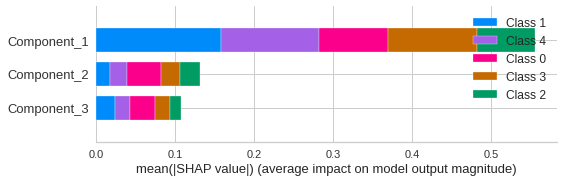

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [71]:
interpret_model(tuned_rf_pca, plot='summary')

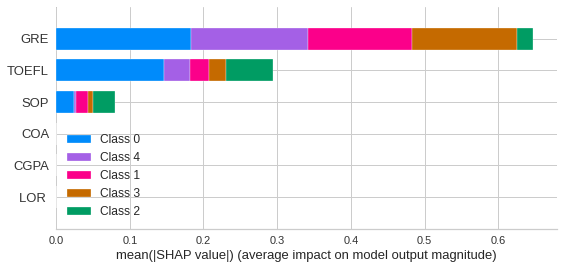

In [72]:
explainer = shap.TreeExplainer(tuned_rf_pca)
X = df.drop('UR', axis=1)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [73]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [74]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
